In [8]:
#Load all libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import datetime as dt
import matplotlib.image as mpimg

# EDA on Datasets

In [11]:

articles = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
customers = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [12]:
# Let's find out the shapes of all three dataframes
shape=pd.DataFrame({"Total Rows":[articles.shape[0],customers.shape[0],transactions.shape[0]],
                    "Total Columns":[articles.shape[1],customers.shape[1],transactions.shape[1]]},index=['articles','customers','transactions'])
shape

,Total Rows,Total Columns
articles,105542,25
customers,1371980,7
transactions,31788324,5


In [13]:
n = len(pd.unique(transactions['customer_id'])) 
m = len(pd.unique(customers['customer_id'])) 
length=len(set(transactions.customer_id.values.tolist()))/customers.shape[0]
npur=100-(length*100)
print("Total No of customers:",m)
print("No of customers who made at least one transaction:",n)
print("% of customers who made a at least one transaction : ",length*100)
print("Number of customers who did not make a purchase : ",(customers.shape[0] - len(set(transactions.customer_id.values.tolist()))))
print("% of customers who did not make a purchase : ",npur)
print("It seems that not all customers made a purchase, there is around 1% with no purchase history.")

Total No of customers: 1371980
No of customers who made at least one transaction: 1362281
% of customers who made a at least one transaction :  99.29306549658158
Number of customers who did not make a purchase :  9699
% of customers who did not make a purchase :  0.7069345034184238
It seems that not all customers made a purchase, there is around 1% with no purchase history.


In [14]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [15]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [16]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [17]:
#check null values in transaction dataset
transactions.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

# Transaction Amount

In [21]:
yearp=transactions.groupby('t_dat').sum()[['price']]
yearwise1p=yearp.reset_index()
#yearwise1p.head()
print (yearwise1p.price.max())

6161.6030677966


In [22]:
yearasec = yearwise1p.sort_values(['price'], ascending=False).head(5)
yearasec

,t_dat,price
373,2019-09-28,6161.603068
435,2019-11-29,4444.342390
9,2018-09-29,4071.381305
569,2020-04-11,3961.987763
64,2018-11-23,3891.939441


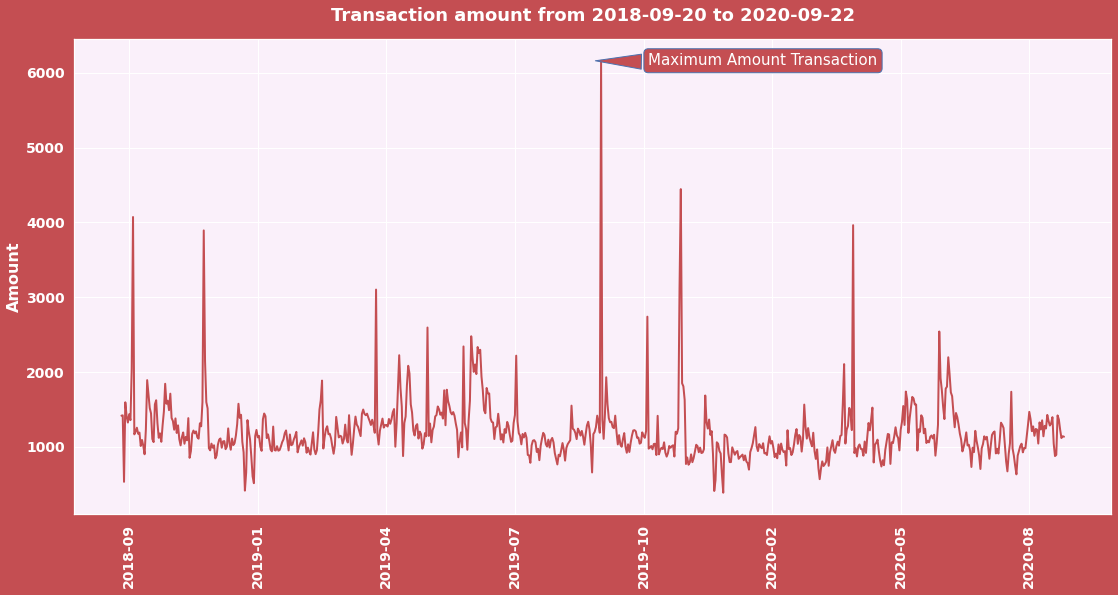

In [33]:
yearwise1p['t_dat'] = pd.to_datetime(yearwise1p['t_dat'], format='%Y/%m/%d')

sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = 'w'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='r')
fig.set_size_inches(18,12)

ax.plot('t_dat', 'price', data=yearwise1p, color='r', linewidth=2)

plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=90)
ttl = ax.set_title('Transaction amount from 2018-09-20 to 2020-09-22', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
x_line_annotation = dt.datetime(2019,9,22)

ax.annotate('Maximum Amount Transaction',
            xy=(x_line_annotation,6161),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='w',
            bbox=dict(boxstyle="round",facecolor='r', edgecolor='b'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='r', 
                            edgecolor='b',
                            relpos=(0.1, 0.4)))

ttl.set_position([.5, 1.02])
ax.set_ylabel('Amount', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

We see that the maximum transaction amount on date 2019-09-28 is 6,161.where as second maximum transaction is 4,444 on date 2019-11-29 which shows that the transacation amount is 25% decreases in 2019-11-29.

# Transaction Amount by Sales Channel

In [45]:
dfp = datanew.groupby(["t_dat", "sales_channel_id"])["price"].sum().reset_index()
print (dfp.price.max())

5365.663576271178


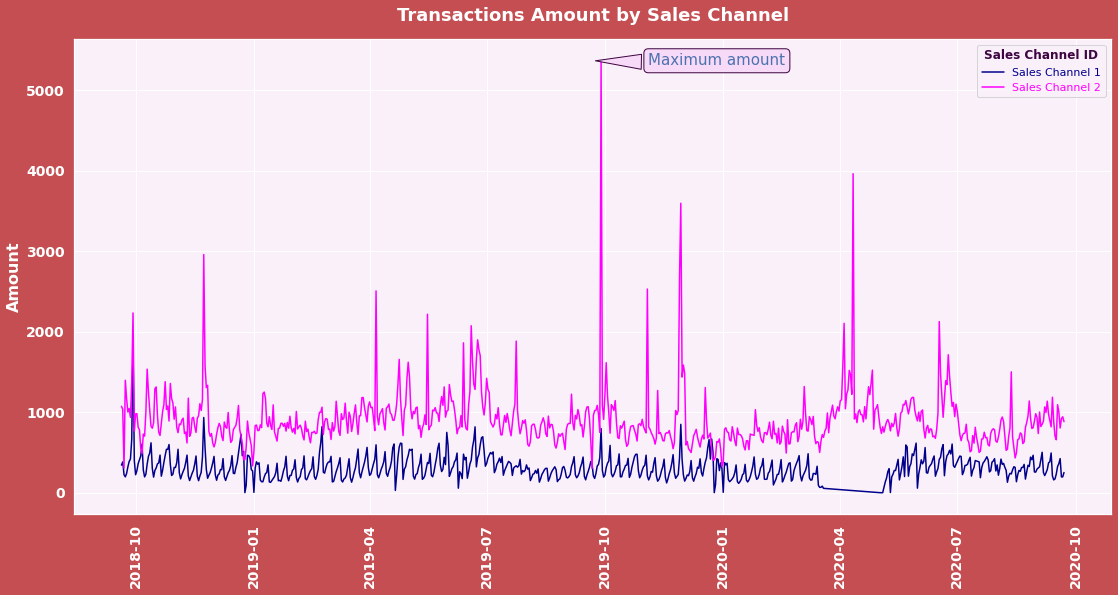

In [53]:
dfp['t_dat'] = pd.to_datetime(dfp['t_dat'], format='%Y/%m/%d')
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = 'w'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='r')
fig.set_size_inches(18,12)

ax.plot(dfp.loc[dfp["sales_channel_id"]==1, "t_dat"], dfp.loc[dfp["sales_channel_id"]==1, "price"], label="Sales Channel 1", color="Darkblue")
ax.plot(dfp.loc[dfp["sales_channel_id"]==2, "t_dat"], dfp.loc[dfp["sales_channel_id"]==2, "price"], label="Sales Channel 2", color="Magenta")
ax.annotate('Maximum amount',
            xy=(x_line_annotation,5365),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='b',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))


ax.set_ylabel('Amount', color=font_color, fontsize=16, **hfont,fontweight = 'bold')

plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
plt.xticks(rotation=90)
legend=plt.legend(title="Sales Channel ID",labelcolor='linecolor')
plt.setp(legend.get_title(), color='#3e0542',fontweight = 'bold')
for label in (ax.get_xticklabels() + ax .get_yticklabels()):
    label.set_fontsize(14)
plt.title(f"Transactions Amount by Sales Channel",fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Sales channel 2 has the highest transaction amount in 3 years.Maximum transaction amount on the date 2019-09-28 are also hit by sales channel 2.Transactions amount are missing for sales channel 1 for few months.